In [50]:
from random import shuffle, sample
from itertools import combinations

def minConflicts(constraints, maxIter, numWizards, log, quit_on_convergence=True):
    currentState = [[False for x in range(numWizards)] for y in range(numWizards)] #matrix of current booleans
    for r in range(numWizards):
        for c in range(r):
            currentState[r][c]=True #possibly might change this to linearized index
            
    min_conflicts = len(constraints)
    stuck_at_min = 0
    
    for i in range(maxIter):
        conflicts = numberConflicting(currentState, constraints)
        log.append(conflicts)
        if i % 100 == 0:
            print("conflicts", conflicts, "iters", i)

        # match
        if conflicts == 0:
            return currentState
        
        # convergence check
        if conflicts < min_conflicts:
            min_conflicts = conflicts
            stuck_at_min = 0
        else:
            stuck_at_min += 1
            if stuck_at_min == 20:
                print("conflicts", conflicts, "iters", i, "QUIT")
                return currentState
        
        
        maxResolve = 0
        maxRow = -1
        maxCol = -1
        for r in range(numWizards):
            for c in range(r):
                currentState[r][c]= not currentState[r][c]
                currentState[c][r]= not currentState[c][r]
                newConflicts = numberConflicting(currentState, constraints)
                if conflicts - newConflicts >= maxResolve:
                    maxResolve = conflicts - newConflicts
                    maxRow = r
                    maxCol = c
                currentState[r][c]= not currentState[r][c]
                currentState[c][r]= not currentState[c][r]
                
        currentState[maxRow][maxCol] = not currentState[maxRow][maxCol]
        currentState[maxCol][maxRow] = not currentState[maxCol][maxRow]
            
    return currentState
        
def numberConflicting(currentState, constraints):
    conflicts = 0
    for c in constraints:
        if isConflicting(currentState, c):
            conflicts += 1
    return conflicts
        
def isConflicting(currentState, c):
    return not ((currentState[c[2]][c[0]] and currentState[c[2]][c[1]]) 
            or (currentState[c[0]][c[2]] and currentState[c[1]][c[2]]) )

def prettyPrint(a):
    for r in range (len(a)):
            print(a[r])

import matplotlib.pyplot as plt

from random import shuffle, sample
from itertools import combinations

def make_ordering(n):
    """Generates a random ordering of n wizards, returned as a
    shuffled list containing the elements 0, 1, ..., n-1"""
    order = list(range(n))
    shuffle(order)
    return order

def make_constraints(order, num_constraints=500):
    """Randomly generates constraints on the wizards' ordering,
    where a constraint [a b c] means c is not between a and b."""
    combos = []
    
    for i in range(len(order)):
        for j in range(i + 1, len(order)):
            for k in range(0, i):
                combos.append((order[i], order[j], order[k]))
            for k in range(j + 1, len(order)):
                combos.append((order[i], order[j], order[k]))
    return sample(combos, num_constraints)

In [51]:
log = []

n = 20
order = make_ordering(n)
print(order)
constraints = make_constraints(order, 500)
a = minConflicts(constraints, 1000, n, log)

[4, 17, 18, 15, 6, 0, 7, 16, 3, 2, 1, 12, 11, 14, 10, 13, 9, 19, 5, 8]
conflicts 180 iters 0
conflicts 106 iters 57 QUIT


In [67]:
data = {} # keys are constraints

n_samples = 10

for c_count in [100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500]:
    data[c_count] = []
    print()
    print("constraint count:", c_count)
    for i in range(n_samples):
        print()
        print("sample", i)
        log = []
        order = make_ordering(20)
        constraints = make_constraints(order, c_count)
        state = minConflicts(constraints, 1000, 20, log)
        data[c_count].append((log, order, constraints, state))


constraint count: 100

sample 0
conflicts 33 iters 0
conflicts 5 iters 45 QUIT

sample 1
conflicts 32 iters 0
conflicts 6 iters 42 QUIT

sample 2
conflicts 28 iters 0
conflicts 4 iters 38 QUIT

sample 3
conflicts 34 iters 0
conflicts 7 iters 42 QUIT

sample 4
conflicts 38 iters 0
conflicts 9 iters 45 QUIT

sample 5
conflicts 42 iters 0
conflicts 4 iters 53 QUIT

sample 6
conflicts 42 iters 0
conflicts 9 iters 49 QUIT

sample 7
conflicts 36 iters 0
conflicts 6 iters 46 QUIT

sample 8
conflicts 30 iters 0
conflicts 4 iters 42 QUIT

sample 9
conflicts 35 iters 0
conflicts 9 iters 41 QUIT

constraint count: 125

sample 0
conflicts 41 iters 0
conflicts 8 iters 47 QUIT

sample 1
conflicts 38 iters 0
conflicts 4 iters 46 QUIT

sample 2
conflicts 51 iters 0
conflicts 9 iters 46 QUIT

sample 3
conflicts 39 iters 0
conflicts 10 iters 45 QUIT

sample 4
conflicts 32 iters 0
conflicts 12 iters 34 QUIT

sample 5
conflicts 40 iters 0
conflicts 9 iters 43 QUIT

sample 6
conflicts 47 iters 0
conflicts

conflicts 61 iters 63 QUIT

sample 7
conflicts 142 iters 0
conflicts 80 iters 58 QUIT

sample 8
conflicts 135 iters 0
conflicts 2 iters 90 QUIT

sample 9
conflicts 153 iters 0
conflicts 86 iters 54 QUIT

constraint count: 450

sample 0
conflicts 136 iters 0
conflicts 54 iters 63 QUIT

sample 1
conflicts 126 iters 0
conflicts 63 iters 54 QUIT

sample 2
conflicts 169 iters 0
conflicts 101 iters 52 QUIT

sample 3
conflicts 141 iters 0
conflicts 63 iters 61 QUIT

sample 4
conflicts 160 iters 0
conflicts 89 iters 56 QUIT

sample 5
conflicts 142 iters 0
conflicts 86 iters 51 QUIT

sample 6
conflicts 153 iters 0
conflicts 89 iters 54 QUIT

sample 7
conflicts 133 iters 0
conflicts 69 iters 61 QUIT

sample 8
conflicts 158 iters 0
conflicts 99 iters 46 QUIT

sample 9
conflicts 164 iters 0
conflicts 94 iters 59 QUIT

constraint count: 475

sample 0
conflicts 170 iters 0
conflicts 94 iters 65 QUIT

sample 1
conflicts 156 iters 0
conflicts 39 iters 85 QUIT

sample 2
conflicts 158 iters 0
conflicts 

225 57 25
450 64 54
100 46 5
325 64 12
200 58 17
425 73 0
300 47 61
175 49 15
400 59 64
275 58 38
500 78 0
150 42 15
375 55 53
250 46 36
475 66 94
125 48 8
350 69 31


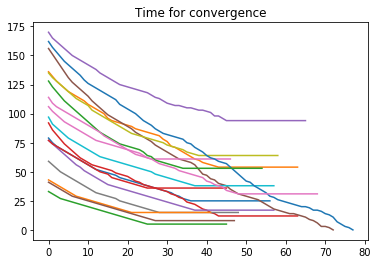

In [70]:
# import numpy as np
import matplotlib.pyplot as plt


plt.title("Time for convergence")
plt.show()

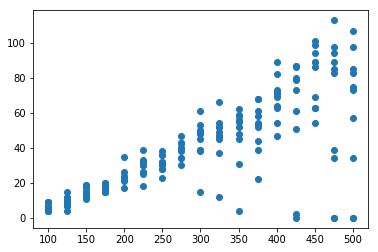

In [71]:
xs, ys = [], []

for k, v in data.items():
    for result in v:
        xs.append(k)
        ys.append(result[0][-1])
plt.scatter(xs,ys)
plt.show()

In [65]:
prettyPrint(a)

[False, False, False, True, False]
[True, False, False, True, False]
[True, True, False, True, False]
[False, False, False, False, False]
[True, True, True, True, False]


In [54]:
print(constraints)

[(0, 1, 2), (3, 0, 2), (3, 4, 2), (3, 0, 4), (0, 4, 2), (3, 1, 4), (1, 4, 2), (0, 1, 4), (3, 0, 1), (3, 1, 2)]
